# 6. EDA - Exploratory Data Analysis

https://www.data-to-viz.com/

### 0. Import modules and load data

In [275]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore') # ignorar warnings


# pa pintar
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.rcParams['figure.figsize']=(8, 6)  # tamaño por defecto, decenas de pixeles

import seaborn as sns  # esta basada en matplotlib

%matplotlib inline

In [276]:
product_df = pd.read_csv('../data/clean/product_simple.csv')
customer_df = pd.read_csv('../data/clean/customer_df.csv')
sale_df = pd.read_csv('../data/clean/sale_df.csv')

#### DataFrame overview - Only Type column contains NA's

In [277]:
display(product_df.shape)
product_df.info()

(25184, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25184 entries, 0 to 25183
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       25184 non-null  object 
 1   colour      25184 non-null  object 
 2   shop        25184 non-null  object 
 3   product_id  25184 non-null  int64  
 4   type        25050 non-null  object 
 5   price_pack  25184 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


## How much data do we have??

We have collected data on clothing products: <br/>
* From **2 stores**: ASOS and Amazon (AWZ) <br/>
* Classified in **15 types** -filtering types with > 100 products
* Classified in **11 colors** -filtering colors with > 900 products



## Products

In [408]:
len(product_df[product_df["shop"]=="asos"])

count_df = pd.DataFrame({'shop': ["ASOS", "AWZ"], 
                   "product": [len(product_df[product_df["shop"]=="asos"]), len(product_df[product_df["shop"]=="amazon"])],
                   "colors": ["grey", "orange"]})

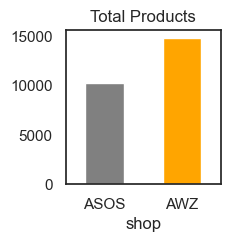

In [279]:
count_df.plot.bar(x='shop', y='product', rot=0, color=df['colors'],
            legend=False, figsize=(2, 2)).set_title('Total Products');


## Products - By `type`

* Note that the y-axis is in a **logarithmic scale** thus, the visual **differences are actually much larger** in size.


* In order to extract ASOS data, we used an API that retrieved info for specific categories (top, sweater, dress ...). Thus, it was expected to confirm that **ASOS dataset includes specific types of clothes that AMZ doesn't**, such as "zapatos" and "casacas sanitarias". Likewise, ASOS collects a much larger number of dresses (vestidos y faldas).


* On the other hand, we get AMZ data by scraping the web in the specific category of "woman t-shirts". Accordingly, **AMZ collects a much larger number of products under the category "camisa".**


* Nonewithstanding, AMZ also returned a considerable number of products that are not stricktely t-shirts. For instance, we find a similar number of products from ASOS and AMZ under the categories: "top", "lenceria" or "pantalones". This indicates that **AMZ quite ignores the filters we asked.**



In [280]:
df=product_df.pivot_table(index="type", values="product_id",columns="shop", aggfunc={"product_id": "count"}).reset_index()
df.set_index('type', inplace=True)
df=df.sort_values("amazon")

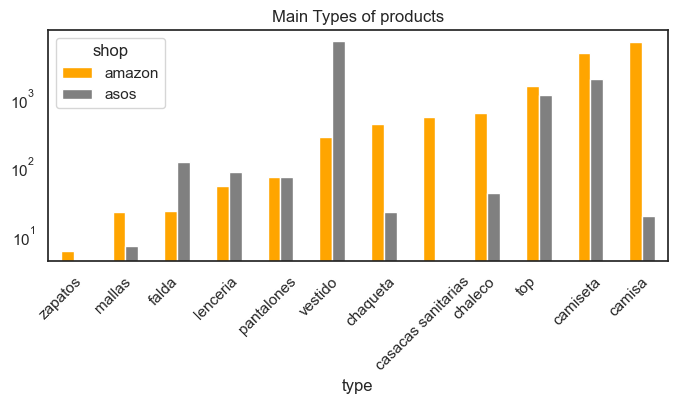

In [281]:
ax = df.plot.bar(rot=45,  align='edge', logy=True, color=["orange", "grey"],figsize=(8,3)).set_title("Main Types of products")

## Products - By `color`

* Note that the y-axis is in a **logarithmic scale** thus, the visual **differences are actually much larger** in size.


* ASOS way of classifing colors was crazy!


* After simplifing the categories into 15 colors we find that the terms **"marfil" and "turquesa"** are only used in AMZ, these could potentially be merged to **"beis" and "blue"**, respectively.


* **AMZ dataset lacks "multicolor"** classification


* "Dorado" is much more represent in AMZ while "plateado" in ASOS


In [282]:
df=product_df.pivot_table(index="colour", values="product_id", columns="shop", aggfunc={"product_id": "count"}).reset_index()
df.set_index('colour', inplace=True)
df=df.sort_values("amazon")

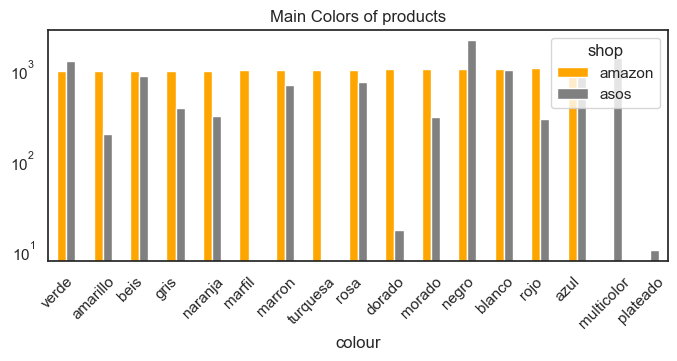

In [283]:
ax = df.plot.bar(rot=45,  align='edge', logy=True, color=["orange", "grey"],figsize=(8,3)).set_title("Main Colors of products")

## Product `type and colour` combined

In [284]:
pivot_df=product_df.pivot_table(index= ["shop", "colour", "type"],
                                   values = ["product_id"],
                                   aggfunc={"product_id": "count"}).reset_index()

In [285]:
# Split the DataFrame into two based on the 'shop' column
amazon_matrix = pivot_df[pivot_df['shop'] == 'amazon'].pivot_table(index='type', columns='colour', values='product_id', fill_value=0)
asos_matrix = pivot_df[pivot_df['shop'] == 'asos'].pivot_table(index='type', columns='colour', values='product_id', fill_value=0)

# Identify unique columns and rows
common_columns = amazon_matrix.columns.union(asos_matrix.columns)
common_rows = amazon_matrix.index.union(asos_matrix.index)


# Reindex both matrices
amazon_matrix = amazon_matrix.reindex(index=common_rows, columns=common_columns, fill_value=0)
asos_matrix = asos_matrix.reindex(index=common_rows, columns=common_columns, fill_value=0)


amazon_matrix_log = np.log1p(amazon_matrix)
asos_matrix_log = np.log1p(asos_matrix)

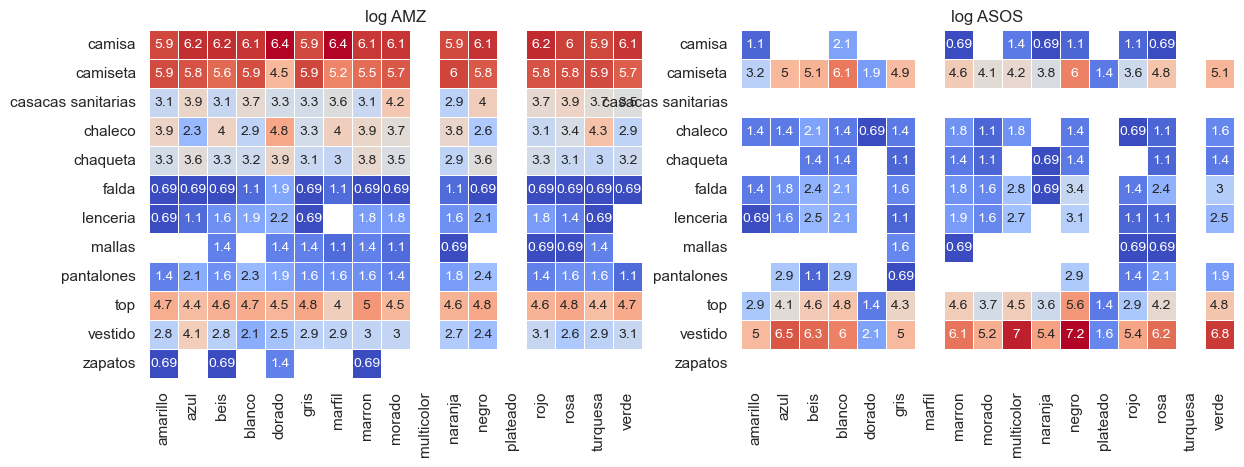

In [286]:
sns.set(style='white')       # estilo blanco

fig, ax = plt.subplots(1, 2, figsize=(14, 5))


sns.heatmap(amazon_matrix_log,             # datos
            mask=(amazon_matrix_log == 0),  # Mask zeros
            cmap='coolwarm', 
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
#            cbar_kws={'shrink': 0},  # barra de color
            cbar=False,
            annot_kws={"size": 10}, 
            annot=True,                # anotacion, el numero escrito
             ax=ax[0]).set_title("log AMZ", fontsize=12)
           
ax[0].set(xlabel="")
ax[0].set(ylabel="")

sns.heatmap(asos_matrix_log,             # datos
            mask=(asos_matrix_log == 0),  # Mask zeros
            cmap='coolwarm', 
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            annot_kws={"size": 10}, 
           # cbar_kws={'shrink': 0.1},  # barra de color
            cbar=False,
            annot=True ,                # anotacion, el numero escrito
            ax=ax[1]).set_title("log ASOS", fontsize=12)

ax[1].set(xlabel="")
ax[1].set(ylabel="");

## Brands

* AWZ dataset collects products from **1320 brands while ASOS 365**.<br/>
* Both collect clothes from **common 35 brands**.

In [287]:
setA=set(product_df["brand"][product_df["shop"]=="asos"])
setB=set(product_df["brand"][product_df["shop"]=="amazon"])

df = pd.DataFrame({'shop': ["ASOS", "AWZ"], "brands": [lenA, lenB], "colors": ["grey", "orange"]})

#### UNION
len_intersection = len(setA.intersection(setB))
lenA = len(setA)-len_intersection
lenB = len(setB)-len_intersection

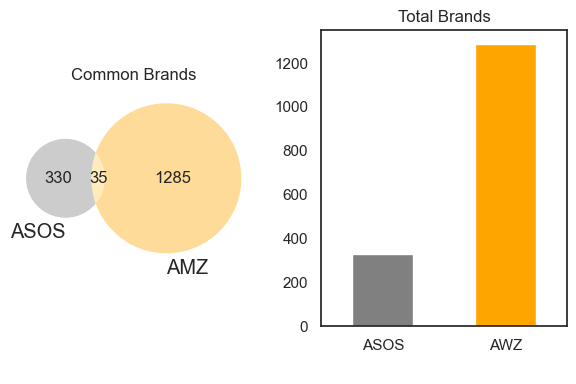

In [337]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4))

# Subplot 1: Venn diagram
venn2(subsets=(lenA, lenB, len(setA.intersection(setB))), #figsize=(4, 4),
      set_labels=("ASOS", "AMZ"), set_colors=('grey', 'orange'), ax=ax[0])
ax[0].set_title("Common Brands")

# Subplot 2: Bar plot
df.plot.bar(x='shop', y='brands', rot=0, color=df['colors'],legend=False, ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_title('Total Brands')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Price distribution

Without further evaluating and filtering the outliers out, the two shops present a similar price distribution.

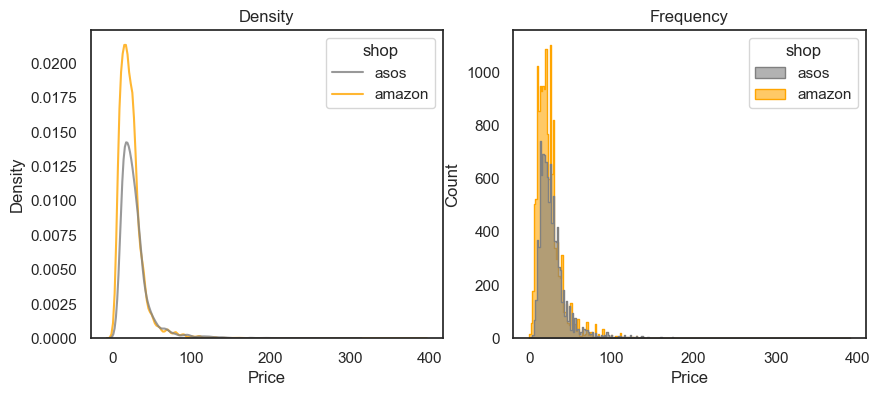

In [338]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

custom_palette = {'amazon': 'orange', 'asos': 'grey'}

# Plot histograms with different colors for each shop
ax[0] = sns.kdeplot(data=product_df, x='price_pack', alpha=0.8, fill=False,
                  hue='shop', palette=custom_palette, ax=ax[0])
ax[0].set(xlabel='Price', ylabel='Density', title='Density')


ax[1] = sns.histplot(data=product_df, x='price_pack', bins=220, alpha=0.6, 
                  hue='shop', palette=custom_palette, element='step')
ax[1].set(xlabel='Price', ylabel='Count', title='Frequency')

plt.show()

### Outliers

* **ASOS has more outliers (in percentage)** <br/>

* Since AMZ and ASOS have a similar distribution, the criteria to classify outliers in ASOS applies in AMZ



In [402]:
sumdf=product_df.groupby("shop")["price_pack"].describe()
sumdf

,count,mean,std,min,25%,50%,75%,max
shop,,,,,,,,
amazon,14893.0,23.428425,16.244077,0.01,13.51,19.99,28.7,390.00
asos,10291.0,28.225167,19.955347,2.78,16.50,24.00,33.0,304.99


In [426]:
AMZ_thr=(sumdf["75%"][0]-sumdf["25%"][0])*1.5
AMZ_thr=sumdf["75%"][0]+AMZ_thr


ASOS_thr=(sumdf["75%"][1]-sumdf["25%"][1])*1.5
ASOS_thr=sumdf["75%"][1]+ASOS_thr


AMZ_outliers = (product_df[product_df['shop'] == 'amazon']["price_pack"] > AMZ_thr).sum()
ASOS_outliers = (product_df[product_df['shop'] == 'asos']["price_pack"] > ASOS_thr).sum()

print("Outlier threshold (AMZ, ASOS):", AMZ_thr, ASOS_thr)
print("Total outliers(AMZ, ASOS):", AMZ_outliers, ASOS_outliers)
print("% Outliers(AMZ, ASOS):", (AMZ_outliers*100)/sumdf["count"][0], (ASOS_outliers*100)/sumdf["count"][1])

Outlier threshold (AMZ, ASOS): 51.485 57.75
Total outliers(AMZ, ASOS): 648 584
% Outliers(AMZ, ASOS): 4.3510374001208625 5.674861529491789


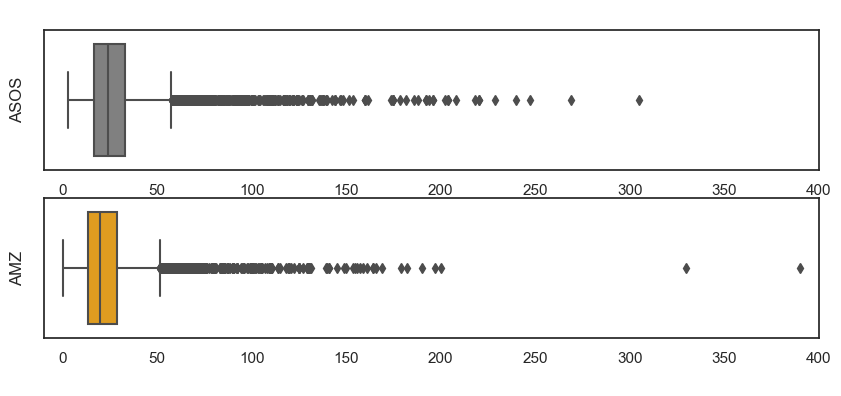

In [400]:
fig, ax = plt.subplots(2,1 , figsize=(10, 4))
custom_palette = {'amazon': 'orange', 'asos': 'grey'}

ax[0]= sns.boxplot(data=product_df[product_df['shop'] == 'asos'], x='price_pack', color=custom_palette['asos'],ax=ax[0])
ax[0].set(ylabel='ASOS', xlabel=' ', title=' ')
ax[0].set_xlim(-10, 400)  # Adjust the limits based on your data

ax[1]= sns.boxplot(data=product_df[product_df['shop'] == 'amazon'], x='price_pack', color=custom_palette['amazon'])
ax[1].set(ylabel='AMZ', xlabel=' ', title=' ')
ax[1].set_xlim(-10, 400)  # Adjust the limits based on your data

plt.show()

### Products in **AMZ are cheaper** than in ASOS

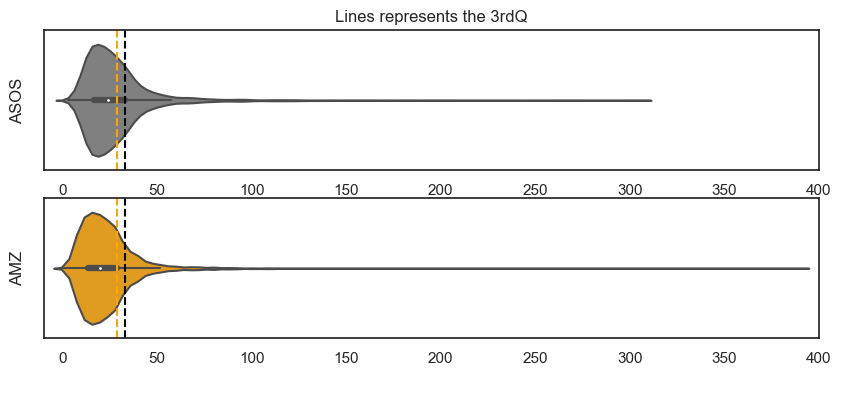

In [401]:
fig, ax = plt.subplots(2,1 , figsize=(10, 4))

custom_palette = {'amazon': 'orange', 'asos': 'grey'}
#sns.boxplot(data=product_df, x='price_pack', hue='shop', palette=custom_palette)

ax[0]= sns.violinplot(data=product_df[product_df['shop'] == 'asos'], x='price_pack', color=custom_palette['asos'],ax=ax[0])
ax[0].set(ylabel='ASOS', xlabel=' ', title='Lines represents the 3rdQ')
ax[0].axvline(x=sumdf["75%"][0], color='orange', linestyle='--')
ax[0].axvline(x=sumdf["75%"][1], color='black', linestyle='--')
ax[0].set_xlim(-10, 400)  # Adjust the limits based on your data

ax[1]= sns.violinplot(data=product_df[product_df['shop'] == 'amazon'], x='price_pack', color=custom_palette['amazon'])
ax[1].set(ylabel='AMZ', xlabel=' ', title=' ')
ax[1].axvline(x=sumdf["75%"][0], color='orange', linestyle='--')
ax[1].axvline(x=sumdf["75%"][1], color='black', linestyle='--')
ax[1].set_xlim(-10, 400)  # Adjust the limits based on your data


plt.show()